                                        Predict the loan sanction amount


                                Cipla Hiring : Data Scientist  (Assignment)

In [18]:
try:
    import os
    from sklearn.linear_model import LinearRegression
    from sklearn.svm import SVR
    
    from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from lightgbm import LGBMRegressor
    from catboost import CatBoostRegressor
    import numpy as np
    from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold,train_test_split
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.metrics import roc_auc_score
    import statsmodels.api as sm
    from sklearn.preprocessing import LabelEncoder
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    sns.set_style('whitegrid')
    plt.style.use('seaborn-deep')
    plt.style.use('fivethirtyeight')
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 14
    plt.rcParams['figure.figsize'] = (12, 8)
    import warnings
    warnings.filterwarnings('ignore')
    import sklearn.base as skb
    import sklearn.metrics as skm
    import sklearn.model_selection as skms
    import sklearn.preprocessing as skp
    import sklearn.utils as sku
    import sklearn.linear_model as sklm
#     from sklearn.impute import KNNImputer
    import sklearn.neighbors as skn
    import sklearn.ensemble as ske
    import catboost as cb
    import scipy.stats as sstats
    import pandas as pd
    import random
    import tabula
    seed = 12
    np.random.seed(seed)
    from datetime import date
    print("Hey Great, all libraries dependencies are successfully Installed.")
except Exception as e:
    print("Message:  Oh! Library {} is not installed or having same issues, Don't worry..\n\n ".format(str(str(e).split()[-1]).replace("'","").replace("'","")))
    try:
        with open("Not_installed_libraries.txt",'w') as file:
            file.write(str(str(e).split()[-1]).replace("'","").replace("'",""))
        print("{} Installing please wait...".format(str(str(e).split()[-1]).replace("'","").replace("'","")))
        !pip install -r Not_installed_libraries.txt
    except Exception as e1:
        print(str(e1),"may be internet is not connecting.")
# run this cell till got "Hey Great, all libraries dependencies are successfully Installed." message

Hey Great, all libraries dependencies are successfully Installed.


# Data Importing  from localhost using Class-Function methods.

In [19]:
# class file_importing():
#     import os
#     try:
#         def file_importing(self,file_path):
#             if "xlsx" in str(file_path) or "xls" in str(file_path):
#                 df=pd.read_excel(file_path)
#                 return df
#             elif "csv" in str(file_path):
#                 df=pd.read_csv(file_path)
#                 return df
#             else:
#                 print("Hey! You are not using any file")
            
#     except Exception as ex:
#         print("Error Excetion type: ",str(ex))
# import pandas as pd
# entries = os.listdir()
# with os.scandir(r'test') as entries:
#     for entry in entries:
#         test=file_importing().file_importing(entry)
# with os.scandir('train') as entries:
#     for entry in entries:
#         train=file_importing().file_importing(entry)
        
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# method : seprate the data into numerical and categorical form

In [20]:
def split_data_into_cat_and_num(dataframe):
    numerical_data=dataframe.select_dtypes(include=np.number)
    categorical_data=dataframe.select_dtypes(exclude=np.number)
    return numerical_data,categorical_data

# Method: Finding co-related columns in which are co-related more than 0.70 

In [21]:
def generate_correlated_columns(dataframe,thres):
    column_having_correlation=set()
    cor_relation_matrix=numerical_data.corr()
    for i in range(len(cor_relation_matrix.columns)):
        for j in range(i):
            if cor_relation_matrix.iloc[i,j]>thres:
                column_having_correlation.add(cor_relation_matrix.columns[i])
    return column_having_correlation

#  Required Methods for data pre-processing.

In [22]:
# remove the skewed data points
def reduce_skewness(dataframe):
    for i in range(len(dataframe.columns)):
        if dataframe[dataframe.columns[i]].skew()>0:
            dataframe[dataframe.columns[i]]=dataframe[dataframe.columns[i]].map(lambda i: np.log(i) if i > 0 else 0) 
        else:
            continue

    return dataframe
#checking outliers of each features by using box-plot
def Outliers_visualization_using_boxplot(dataframe,column_name):
    fig = plt.figure(figsize=(16, 6))
    box_plot=plt.boxplot(dataframe[column_name])
    title=plt.title(str(column_name))
    legend=plt.legend()
    return box_plot,title,legend
# creating dummy data of categorical features
def create_dummies_data(dataframe,feature_list):
    dummies_data=pd.get_dummies(dataframe[feature_list],dummy_na=True)
    return dummies_data
#Checking frequancies in_each feature
def check_frequancies_in_each_feature(dataframe,features_list):
    for i in range(len(features_list)):
        print("feature name {} having frequencies \n".format(dataframe.columns[i]),dataframe[dataframe.columns[i]].value_counts(),"\n\n")

# Encoding the features values from word(char) to numeric vector by using Label_Encoder Scikit Library
def genrate_numeric_encoding(dataframe,feature_name):
    Encoder_obj=LabelEncoder()
    encoded_feature=Encoder_obj.fit_transform(dataframe[feature_name].astype('str'))
    return encoded_feature

In [23]:


test['Co-Applicant']=test['Co-Applicant'].replace("?",np.nan)

In [24]:
test['Property Price'].value_counts()


test['Property Price']=test['Property Price'].replace("?",np.nan)

In [25]:
test['Property Price']=test['Property Price'].astype('float')
test['Co-Applicant']=test['Co-Applicant'].astype('float')

In [26]:

numerical_data,categorical_data=split_data_into_cat_and_num(train)

numerical_data_test,categorical_data_test=split_data_into_cat_and_num(test)


In [27]:
numerical_data.columns,numerical_data_test.columns

(Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
        'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
        'No. of Defaults', 'Property ID', 'Property Age', 'Property Type',
        'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)'],
       dtype='object'),
 Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
        'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
        'No. of Defaults', 'Property ID', 'Property Age', 'Property Type',
        'Co-Applicant', 'Property Price'],
       dtype='object'))

In [28]:
categorical_data.shape,numerical_data.shape #training data 

((30000, 11), (30000, 13))

In [29]:
numerical_data_test.shape,categorical_data_test.shape #testing data

((20000, 12), (20000, 11))

In [30]:
#testing data % over all date
print("{}%".format(numerical_data_test.shape[0]/(numerical_data_test.shape[0]+numerical_data.shape[0])*100))

40.0%


In [31]:
#training data % over all date
print("{}%".format((numerical_data.shape[0])/(numerical_data_test.shape[0]+numerical_data.shape[0])*100))

60.0%


In [32]:
numerical_data.head(5)

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,56,1933.05,72809.58,241.08,3.0,809.44,0,746,1933.05,4,1,119933.46,54607.18
1,32,4952.91,46837.47,495.81,1.0,780.40,0,608,4952.91,2,1,54791.00,37469.98
2,65,988.19,45593.04,171.95,1.0,833.15,0,546,988.19,2,0,72440.58,36474.43
3,65,NaN,80057.92,298.54,2.0,832.70,1,890,NaN,2,1,121441.51,56040.54
4,31,2614.77,113858.89,491.41,NaN,745.55,1,715,2614.77,4,1,208567.91,74008.28


In [33]:
numerical_data_test.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price
0,47,3472.69,137088.98,396.72,2.0,799.14,0,843,3472.69,2,1.0,236644.50
1,57,1184.84,104771.59,463.76,2.0,833.31,0,22,1184.84,1,1.0,142357.30
2,52,1266.27,176684.91,493.15,3.0,627.44,0,1,1266.27,1,1.0,300991.24
3,65,1369.72,97009.18,446.15,2.0,833.20,0,730,1369.72,1,0.0,125612.10
4,60,1939.23,109980.00,370.10,NaN,NaN,0,356,1939.23,4,1.0,180908.00


In [34]:
categorical_data_test.head()

,Customer ID,Name,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
0,C-26247,Tandra Olszewski,F,Low,Commercial associate,Managers,Semi-Urban,N,N,Unpossessed,Urban
1,C-35067,Jeannette Cha,F,Low,Working,Sales staff,Rural,Y,Y,Unpossessed,Rural
2,C-34590,Keva Godfrey,F,Low,Working,NaN,Semi-Urban,N,Y,Unpossessed,Urban
3,C-16668,Elva Sackett,M,High,Pensioner,NaN,Rural,N,Y,Inactive,Semi-Urban
4,C-12196,Sade Constable,F,High,Pensioner,NaN,Urban,N,N,NaN,Semi-Urban


# data preprocessing for numerical data -> training and testing data

In [35]:
numerical_data[numerical_data.isnull().any(axis=1)]

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
3,65,NaN,80057.92,298.54,2.0,832.70,1,890,NaN,2,1,121441.51,56040.54
4,31,2614.77,113858.89,491.41,NaN,745.55,1,715,2614.77,4,1,208567.91,74008.28
7,45,NaN,240311.77,807.64,2.0,812.26,0,314,NaN,2,1,401040.70,168218.24
19,41,1837.17,112910.57,422.61,NaN,722.74,0,499,1837.17,4,1,128407.60,73391.87
30,32,2478.54,30195.97,225.64,1.0,NaN,0,581,2478.54,2,1,45299.77,24156.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29981,62,1608.93,136973.99,432.53,NaN,737.01,0,395,1608.93,4,1,214606.95,89033.09
29991,55,NaN,127571.87,707.74,2.0,NaN,0,213,NaN,4,1,195998.69,95678.90
29993,62,NaN,9811.65,107.88,2.0,709.43,1,404,NaN,2,1,17956.31,6377.57
29994,39,2250.19,83810.38,430.66,3.0,NaN,0,265,2250.19,3,1,129028.33,62857.78


In [36]:
def Nan_Contain_columns(dataframe):
    Nan_contains_column=[]
    for i in range(len(dataframe.columns)):
        if dataframe[dataframe.columns[i]].isnull().sum()>0:
            Nan_contains_column.append(dataframe.columns[i])
    return Nan_contains_column

In [37]:
Nan_contains_column_numeric_train=Nan_Contain_columns(numerical_data)
Nan_contains_column_numeric_test=Nan_Contain_columns(numerical_data_test)


In [38]:
Nan_contains_column_categorical_train=Nan_Contain_columns(categorical_data)
Nan_contains_column_categorical_test=Nan_Contain_columns(categorical_data_test)


In [39]:
Nan_contains_column_numeric_train,Nan_contains_column_numeric_test

(['Income (USD)',
  'Current Loan Expenses (USD)',
  'Dependents',
  'Credit Score',
  'Property Age',
  'Loan Sanction Amount (USD)'],
 ['Income (USD)',
  'Current Loan Expenses (USD)',
  'Dependents',
  'Credit Score',
  'Property Age',
  'Co-Applicant',
  'Property Price'])

In [40]:
Nan_contains_column_categorical_train,Nan_contains_column_categorical_test

(['Gender',
  'Income Stability',
  'Type of Employment',
  'Has Active Credit Card',
  'Property Location'],
 ['Gender',
  'Income Stability',
  'Type of Employment',
  'Has Active Credit Card',
  'Property Location'])

you can see each columns having huge approx 10-35% Nan value So, we have to perform multiple technique to check MSE value

In [41]:
categorical_data.head()

,Customer ID,Name,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
0,C-36995,Frederica Shealy,F,Low,Working,Sales staff,Semi-Urban,N,N,NaN,Rural
1,C-33999,America Calderone,M,Low,Working,NaN,Semi-Urban,N,Y,Unpossessed,Rural
2,C-3770,Rosetta Verne,F,High,Pensioner,NaN,Semi-Urban,N,Y,Unpossessed,Urban
3,C-26480,Zoe Chitty,F,High,Pensioner,NaN,Rural,N,Y,Unpossessed,Semi-Urban
4,C-23459,Afton Venema,F,Low,Working,High skill tech staff,Semi-Urban,N,Y,Active,Semi-Urban


In [42]:
categorical_data=categorical_data.drop(['Customer ID','Name'],1)

In [43]:
check_frequancies_in_each_feature(categorical_data,categorical_data.columns.tolist())

feature name Gender having frequencies 
 M    15053
F    14894
Name: Gender, dtype: int64 


feature name Income Stability having frequencies 
 Low     25751
High     2566
Name: Income Stability, dtype: int64 


feature name Profession having frequencies 
 Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Maternity leave             1
Student                     1
Name: Profession, dtype: int64 


feature name Type of Employment having frequencies 
 Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               

In [44]:
categorical_data.isnull().sum()

Gender                      53
Income Stability          1683
Profession                   0
Type of Employment        7270
Location                     0
Expense Type 1               0
Expense Type 2               0
Has Active Credit Card    1566
Property Location          356
dtype: int64

In [45]:
train[['Gender','Loan Sanction Amount (USD)']][train[['Gender','Loan Sanction Amount (USD)']].isnull().any(axis=1)].Gender.value_counts()

F    176
M    163
Name: Gender, dtype: int64

In [46]:
train.Gender.value_counts()

M    15053
F    14894
Name: Gender, dtype: int64

In [47]:
categorical_data.head()

,Gender,Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location
0,F,Low,Working,Sales staff,Semi-Urban,N,N,NaN,Rural
1,M,Low,Working,NaN,Semi-Urban,N,Y,Unpossessed,Rural
2,F,High,Pensioner,NaN,Semi-Urban,N,Y,Unpossessed,Urban
3,F,High,Pensioner,NaN,Rural,N,Y,Unpossessed,Semi-Urban
4,F,Low,Working,High skill tech staff,Semi-Urban,N,Y,Active,Semi-Urban


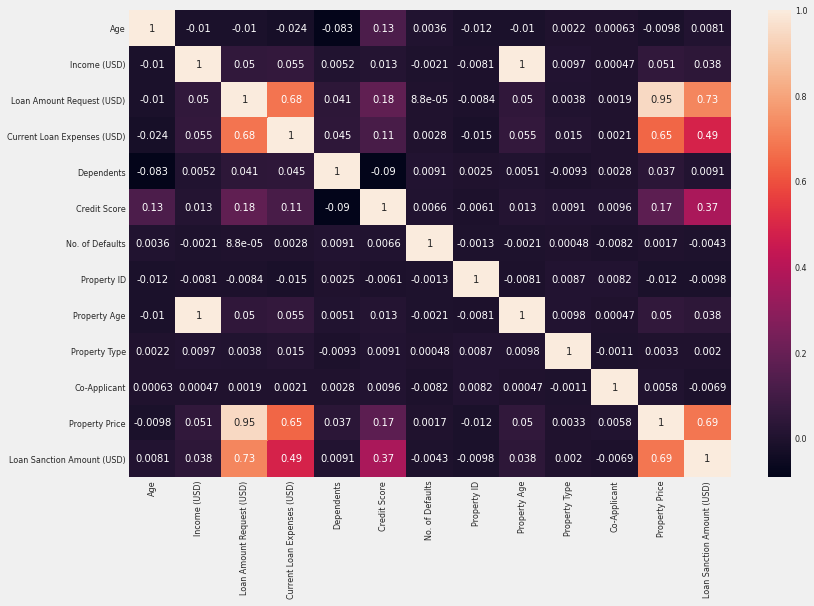

In [48]:
sns.heatmap(numerical_data.corr(),annot=True)

In [49]:
correlation_feature_train=generate_correlated_columns(numerical_data,0.9)

In [50]:
correlation_feature_test=generate_correlated_columns(numerical_data_test,0.9)

In [51]:
correlation_feature_test,correlation_feature_train

({'Property Age', 'Property Price'}, {'Property Age', 'Property Price'})

In [52]:
numerical_data_test.columns,categorical_data_test.columns

(Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
        'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
        'No. of Defaults', 'Property ID', 'Property Age', 'Property Type',
        'Co-Applicant', 'Property Price'],
       dtype='object'),
 Index(['Customer ID', 'Name', 'Gender', 'Income Stability', 'Profession',
        'Type of Employment', 'Location', 'Expense Type 1', 'Expense Type 2',
        'Has Active Credit Card', 'Property Location'],
       dtype='object'))

In [53]:
after_remove_co_related_data=numerical_data.drop(['Property Age', 'Property Price'],1)
after_remove_co_related_data_test=numerical_data_test.drop(['Property Age', 'Property Price'],1)


In [54]:
numerical_data_test.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price
0,47,3472.69,137088.98,396.72,2.0,799.14,0,843,3472.69,2,1.0,236644.50
1,57,1184.84,104771.59,463.76,2.0,833.31,0,22,1184.84,1,1.0,142357.30
2,52,1266.27,176684.91,493.15,3.0,627.44,0,1,1266.27,1,1.0,300991.24
3,65,1369.72,97009.18,446.15,2.0,833.20,0,730,1369.72,1,0.0,125612.10
4,60,1939.23,109980.00,370.10,NaN,NaN,0,356,1939.23,4,1.0,180908.00


In [55]:
categorical_data_test.head()
Need_ID=categorical_data_test['Customer ID']
categorical_data_test=categorical_data_test.drop(['Customer ID','Name'],1)

In [56]:
categorical_data_dummy_train=create_dummies_data(categorical_data,categorical_data.columns)

In [57]:
categorical_data_dummy_test=create_dummies_data(categorical_data_test,categorical_data_test.columns)

In [58]:
joined_categorical_numerical_train=after_remove_co_related_data.join(categorical_data_dummy_train)

In [59]:
joined_categorical_numerical_test=after_remove_co_related_data_test.join(categorical_data_dummy_test)

In [60]:
joined_categorical_numerical_train=joined_categorical_numerical_train.drop(['Profession_Businessman'],1)

In [61]:
joined_categorical_numerical_train.shape,joined_categorical_numerical_test.shape

((30000, 62), (20000, 61))

In [62]:
a=list(joined_categorical_numerical_train.columns)
b=list(joined_categorical_numerical_test.columns)
for i in a:
  if i in b:
    continue
  else:
    print(i)

Loan Sanction Amount (USD)


In [63]:
# target=joined_categorical_numerical_train['Loan Sanction Amount (USD)']
# joined_categorical_numerical_train=joined_categorical_numerical_train.drop(['Loan Sanction Amount (USD)'],1)

In [64]:
drop_target_nan_value=joined_categorical_numerical_train.dropna(subset=['Loan Sanction Amount (USD)'])

In [65]:
drop_target_nan_value=drop_target_nan_value.reset_index().drop(['index'],1)

In [66]:
drop_target_nan_value

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Type,Co-Applicant,Loan Sanction Amount (USD),Gender_F,Gender_M,Gender_nan,Income Stability_High,Income Stability_Low,Income Stability_nan,Profession_Commercial associate,Profession_Maternity leave,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Profession_nan,Type of Employment_Accountants,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Waiters/barmen staff,Type of Employment_nan,Location_Rural,Location_Semi-Urban,Location_Urban,Location_nan,Expense Type 1_N,Expense Type 1_Y,Expense Type 1_nan,Expense Type 2_N,Expense Type 2_Y,Expense Type 2_nan,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Has Active Credit Card_nan,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban,Property Location_nan
0,56,1933.05,72809.58,241.08,3.0,809.44,0,746,4,1,54607.18,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
1,32,4952.91,46837.47,495.81,1.0,780.40,0,608,2,1,37469.98,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
2,65,988.19,45593.04,171.95,1.0,833.15,0,546,2,0,36474.43,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,65,NaN,80057.92,298.54,2.0,832.70,1,890,2,1,56040.54,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
4,31,2614.77,113858.89,491.41,NaN,745.55,1,715,4,1,74008.28,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29655,38,4969.41,76657.90,722.34,2.0,869.61,0,566,4,1,68992.11,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
29656,20,1606.88,66595.14,253.04,3.0,729.41,0,175,3,1,46616.60,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
29657,49,NaN,81410.08,583.11,NaN,NaN,0,959,1,1,61057.56,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
29658,38,2417.71,142524.10,378.29,3.0,677.27,1,375,4,1,99766.87,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


In [67]:
# # compare statistical imputation strategies for the horse colic dataset
# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold,KFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

X, y = drop_target_nan_value.drop(['Loan Sanction Amount (USD)'],1),drop_target_nan_value['Loan Sanction Amount (USD)']
# # evaluate each strategy on the dataset
# results = list()
# strategies = ['mean', 'median', 'most_frequent', 'constant']
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestRegressor())])
# 	# evaluate the model
# 	cv = KFold(n_splits=15, random_state=1)
# 	scores = cross_val_score(pipeline, X, y, cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()
# >mean 0.744 (0.028)
# >median 0.743 (0.029)
# >most_frequent 0.743 (0.031)
# >constant 0.741 (0.028)

In [68]:
import numpy as np
#If "mean", then replace missing values using the mean along
'''      each column. Can only be used with numeric data.
    - If "median", then replace missing values using the median along
      each column. Can only be used with numeric data.
    - If "most_frequent", then replace missing using the most frequent
      value along each column. Can be used with strings or numeric data.
    - If "constant", then replace missing values with fill_value. Can be
      used with strings or numeric data.

    .. versionadded:: 0.20
       strategy="constant" for fixed value imputation'''
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer

# Imputer object using the mean strategy and
# missing_values type for imputation
strategies = ['mean', 'median', 'most_frequent', 'constant']
data_collection=[]
for i in strategies:
    imputer = SimpleImputer(missing_values = np.nan,strategy =i)
    imputer = imputer.fit(X.values)
    data_collection.append(imputer.transform(X.values))



In [69]:
import numpy as np
#If "mean", then replace missing values using the mean along
'''      each column. Can only be used with numeric data.
    - If "median", then replace missing values using the median along
      each column. Can only be used with numeric data.
    - If "most_frequent", then replace missing using the most frequent
      value along each column. Can be used with strings or numeric data.
    - If "constant", then replace missing values with fill_value. Can be
      used with strings or numeric data.

    .. versionadded:: 0.20
       strategy="constant" for fixed value imputation'''
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer

# Imputer object using the mean strategy and
# missing_values type for imputation
strategies = ['mean', 'median', 'most_frequent', 'constant']
data_collection_test=[]
for i in strategies:
    imputer = SimpleImputer(missing_values = np.nan,strategy =i)
    imputer = imputer.fit(joined_categorical_numerical_test.values)
    data_collection_test.append(imputer.transform(joined_categorical_numerical_test.values))



In [70]:
df1_test=pd.DataFrame(data_collection_test[0],columns=joined_categorical_numerical_test.columns)
df2_test=pd.DataFrame(data_collection_test[1],columns=joined_categorical_numerical_test.columns)
df3_test=pd.DataFrame(data_collection_test[2],columns=joined_categorical_numerical_test.columns)
df4_test=pd.DataFrame(data_collection_test[3],columns=joined_categorical_numerical_test.columns)


In [71]:
df1=pd.DataFrame(data_collection[0],columns=X.columns)
df2=pd.DataFrame(data_collection[1],columns=X.columns)
df3=pd.DataFrame(data_collection[2],columns=X.columns)
df4=pd.DataFrame(data_collection[3],columns=X.columns)


In [72]:
y.isnull().sum()

0

In [73]:
# cols = list(df1.columns)
# pmax = 1
# while (len(cols)>0):
#     p= []
#     X_1 = df1[cols]
#     X_1 = sm.add_constant(X_1)
#     model = sm.OLS(y,X_1).fit()
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.05):
#         cols.remove(feature_with_p_max)
#     else:
#         break
# selected_features_BE = cols
# print(len(selected_features_BE))

In [74]:
# from sklearn.model_selection import train_test_split

In [75]:
# np.random.seed(0)
# x_train,x_test,y_train,y_test=train_test_split(df1,y,test_size=.30)

In [76]:
model1=RandomForestRegressor()
model2=LinearRegression()
model3=SVR()
model4=LGBMRegressor()
model5=LinearRegression()
model6=AdaBoostRegressor()
model7=BaggingRegressor()
model8=ExtraTreesRegressor()
model9=GradientBoostingRegressor()
model10=AdaBoostRegressor()
model11=BaggingRegressor()
model12=ExtraTreesRegressor()
model13=KNeighborsRegressor()
model14=DecisionTreeRegressor()


In [77]:
np.random.seed(0)
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=.30)

In [78]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20762, 61), (8898, 61), (20762,), (8898,))

In [91]:
model15=CatBoostRegressor()
# # model15.fit(x_train,y_train)

# #model1.fit(x_train,y_train)
# # model2.fit(x_train,y_train)
# # model3.fit(x_train,y_train)
model4.fit(df2,y)
# model5.fit(x_train,y_train)
# model6.fit(x_train,y_train)
# model7.fit(x_train,y_train)
# model8.fit(x_train,y_train)
# model9.fit(x_train,y_train)
# model10.fit(x_train,y_train)
# model11.fit(x_train,y_train)
# model12.fit(x_train,y_train)
# model13.fit(x_train,y_train)
# model14.fit(x_train,y_train)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

grid = GridSearchCV(LGBMRegressor(random_state=0), params, scoring='r2', cv=3)
grid.fit(df1, y)

In [120]:
# predict_value=model4.predict(x_test)
# predict_value[0:10]
numerical_data.columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property ID', 'Property Age', 'Property Type',
       'Co-Applicant', 'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [122]:
from xgboost.sklearn import XGBRegressor

In [139]:
# xgb1 = XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# xgb_grid = GridSearchCV(xgb1,
#                         parameters,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

grid.fit(df2,y)

GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_bin=512, max_depth=-1,
                                     min_child_samples=5, min_child_weight=1,
                                     min_split_gain=0.5, n_estimators=100,
                                     n_jobs=3, num_leaves=31,
                                     objective='binary', random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0,
                                     s...
             iid='deprecated', n_jobs=2,
             param_grid={'boosting_type': ['gbdt'],
                         'colsample_bytree': [0.65, 0.66],
                         'learning_rate': [0.005], 'n_estimators': [40],
                         'num_leaves': [6, 8, 12, 16], '

In [140]:

predict_value=grid.predict(df2_test)

In [141]:

subm=pd.DataFrame({'Customer ID':Need_ID,'Loan Sanction Amount (USD)':predict_value})
subm.to_csv("submissionlgbmgrid_df2.csv",index=False)

In [144]:
d=pd.read_csv("submissionlgbmgrid_df2.csv")
str(d['Loan Sanction Amount (USD)'][0])

0.7430068547850298

In [86]:
# k=[model1,model2,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14]
# for i in k:
#   pred1=i.predict(x_test)
#   score = max(0, 100*metrics.r2_score(y_test, pred1))
#   print(score)

In [ ]:
k=[model1,model2,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14]
for i in k:
  pred1=i.predict(x_test)
  score = max(0, 100*metrics.r2_score(y_test, pred1))
  print(score)

75.66464240601805
29.023728383185286
77.54520764367184
29.023728383185286
46.19456019736548
73.5603978926908
72.73241803113908
75.03905241257307
50.83936344759387
74.06067698423702
72.74950376955822
45.310018720884294
51.78129555940304


In [ ]:
k=[model1,model2,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14]
for i in k:
  pred1=i.predict(x_test)
  score = max(0, 100*metrics.r2_score(y_test, pred1))
  print(score)

76.17523704982206
59.99971060353565
0.5968314590637736
77.32832927736757
59.99971060353565
49.969070871643
74.25981472465268
74.32765920138688
76.58112769028571
51.24009907341971
74.57963177510474
74.23535918985569
44.97584306808149
51.56991013079255


In [ ]:
print(model1.score(x_train,y_train),model1.score(x_test,y_test)) #above average train - 97% test 79%
print(model2.score(x_train,y_train),model2.score(x_test,y_test)) # average accuracy train -64% test 64%
print(model3.score(x_train,y_train),model3.score(x_test,y_test))# not giving much accuracy--excluded
print(model4.score(x_train,y_train),model4.score(x_test,y_test))# good accuracy train  84% test 79%
print(model5.score(x_train,y_train),model5.score(x_test,y_test)) # avearge
print(model6.score(x_train,y_train),model6.score(x_test,y_test))#below average
print(model7.score(x_train,y_train),model7.score(x_test,y_test))# above avearge
print(model8.score(x_train,y_train),model8.score(x_test,y_test))# just aveage
print(model9.score(x_train,y_train),model9.score(x_test,y_test))#average
print(model10.score(x_train,y_train),model10.score(x_test,y_test)) # below average
print(model11.score(x_train,y_train),model11.score(x_test,y_test)) # above average
print(model12.score(x_train,y_train),model12.score(x_test,y_test)) #  average
print(model13.score(x_train,y_train),model13.score(x_test,y_test)) #very bad
print(model14.score(x_train,y_train),model14.score(x_test,y_test)) #average
print(model15.score(x_train,y_train),model15.score(x_test,y_test)) # good

0.9671247383575418 0.7594960994308605
0.5841447419428843 0.5965034871708328
0.003134231209600547 0.005494477841561873
0.8480177632372572 0.7695241829007854
0.5841447419428843 0.5965034871708328
0.488897467088238 0.48279028912836336
0.9554478402809015 0.7406124167174672
1.0 0.7408491627996889
0.7857723724082054 0.7581924105839424
0.4943689146083799 0.49160911311553535
0.954160864070439 0.733966864718478
1.0 0.7414721740157725
0.6176204972942927 0.44472603218395396
1.0 0.5333033892203969
0.8782960614224484 0.7662123167972331


In [ ]:
# print(model1.score(x_train,y_train),model1.score(x_test,y_test)) #above average train - 97% test 79%
# print(model2.score(x_train,y_train),model2.score(x_test,y_test)) # average accuracy train -64% test 64%
# print(model3.score(x_train,y_train),model3.score(x_test,y_test))# not giving much accuracy--excluded
# print(model4.score(x_train,y_train),model4.score(x_test,y_test))# good accuracy train  84% test 79%
# print(model5.score(x_train,y_train),model5.score(x_test,y_test)) # avearge
# print(model6.score(x_train,y_train),model6.score(x_test,y_test))#below average
# print(model7.score(x_train,y_train),model7.score(x_test,y_test))# above avearge
# print(model8.score(x_train,y_train),model8.score(x_test,y_test))# just aveage
# print(model9.score(x_train,y_train),model9.score(x_test,y_test))#average
# print(model10.score(x_train,y_train),model10.score(x_test,y_test)) # below average
# print(model11.score(x_train,y_train),model11.score(x_test,y_test)) # above average
# print(model12.score(x_train,y_train),model12.score(x_test,y_test)) #  average
# print(model13.score(x_train,y_train),model13.score(x_test,y_test)) #very bad
# print(model14.score(x_train,y_train),model14.score(x_test,y_test)) #average
# print(model15.score(x_train,y_train),model15.score(x_test,y_test)) # good

0.9662929374794442 0.7734513212620987
0.5818300339093989 0.6012544874143946
0.0011003936969252726 -0.005638515600421723
0.8470937018626192 0.7871974545945248
0.5818300339093989 0.6012544874143946
0.5071692801020166 0.49798224256976087
0.9551740922489543 0.755048689911196
1.0 0.7549011727135134
0.7807972052717587 0.7741688670107033
0.49853289818910285 0.49064042757658877
0.9529205198628925 0.7532161101629136
1.0 0.7546377809408213
0.6166036395881975 0.4479583382284878
1.0 0.5452300354962449
0.8792781983603756 0.7868252780707722


In [ ]:
print(model1.score(x_train,y_train),model1.score(x_test,y_test)) # above average
print(model2.score(x_train,y_train),model2.score(x_test,y_test)) #  average
print(model3.score(x_train,y_train),model3.score(x_test,y_test)) #very bad
print(model4.score(x_train,y_train),model4.score(x_test,y_test)) #average

0.5825766675898392 0.5999227760471235
0.9673413546061669 0.7619595755629931
0.8482992182875635 0.7723024227082964
1.0 0.5353074621903944


In [ ]:
print(model1.score(x_train,y_train),model1.score(x_test,y_test)) # above average
print(model2.score(x_train,y_train),model2.score(x_test,y_test)) #  average
print(model3.score(x_train,y_train),model3.score(x_test,y_test)) #very bad
print(model4.score(x_train,y_train),model4.score(x_test,y_test)) #average

0.5879620033017161 0.5876619075434275
0.9668657692125134 0.7665147878346567
0.8423024442111077 0.7859863046035682
1.0 0.5371193003140156
